t=0s,  distance r=384400000.00m,  v_lune=1.619e+00,1.022e+03m/s,  Pos: x_lune=3.844e+08,y_moon=6.132e+05 m
t=600s,  distance r=384401472.16m,  v_lune=3.237e+00,1.022e+03m/s,  Pos: x_lune=3.844e+08,y_moon=1.226e+06 m
t=1200s,  distance r=384404905.56m,  v_lune=4.856e+00,1.022e+03m/s,  Pos: x_lune=3.844e+08,y_moon=1.840e+06 m
t=1800s,  distance r=384410300.16m,  v_lune=6.474e+00,1.022e+03m/s,  Pos: x_lune=3.844e+08,y_moon=2.453e+06 m
t=2400s,  distance r=384417655.88m,  v_lune=8.092e+00,1.022e+03m/s,  Pos: x_lune=3.844e+08,y_moon=3.066e+06 m
t=3000s,  distance r=384426972.63m,  v_lune=9.711e+00,1.022e+03m/s,  Pos: x_lune=3.844e+08,y_moon=3.679e+06 m
t=3600s,  distance r=384438250.29m,  v_lune=1.133e+01,1.022e+03m/s,  Pos: x_lune=3.844e+08,y_moon=4.292e+06 m
t=4200s,  distance r=384451488.72m,  v_lune=1.295e+01,1.022e+03m/s,  Pos: x_lune=3.844e+08,y_moon=4.906e+06 m
t=4800s,  distance r=384466687.74m,  v_lune=1.456e+01,1.022e+03m/s,  Pos: x_lune=3.844e+08,y_moon=5.519e+06 m
t=5400s,  dist

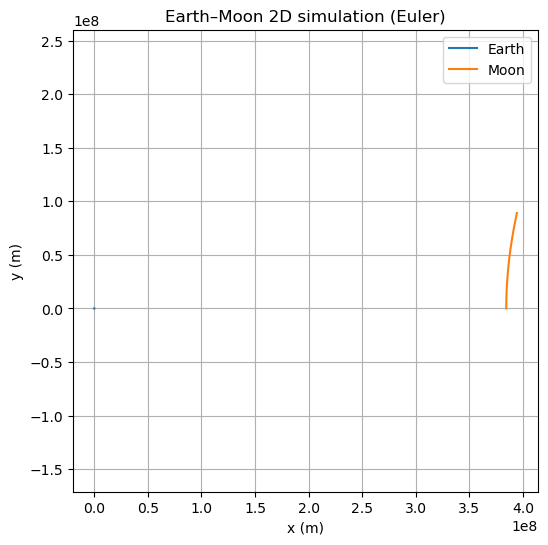

In [6]:
import math
import matplotlib.pyplot as plt

# Debug
debug = True

# --- Constantes ---
G = 6.67430e-11             # Constante gravitationnelle
M_EARTH = 5.97219e24        # Masse de la Terre (kg)
M_MOON = 7.3477e22          # Masse de la Lune (kg)

# --- Paramètres initiaux ---
# Positions (en m)
x_earth = 0.0
y_earth = 0.0

x_moon = 3.844e8   # ~384 400 km (axe x)
y_moon = 0.0

# Vitesses initiales (en m/s)
vx_earth = 0.0
vy_earth = 0.0

vx_moon = 0.0
vy_moon = 1.022e3  # ~1,022 km/s sur l'axe y

# Paramètres temporels
t = 0.0
dt = 600.0          # 60 s
# T_MAX = 27.3 * 24 * 3600  # ~27,3 jours en secondes (1 cycle lunaire approx.)
T_MAX = 24 * 3600  # ex. 1 jour de simulation
# Listes pour tracer
times = []
earth_x_positions = []
earth_y_positions = []
moon_x_positions = []
moon_y_positions = []

while t <= T_MAX:
    # On enregistre l'état actuel
    times.append(t)
    earth_x_positions.append(x_earth)
    earth_y_positions.append(y_earth)
    moon_x_positions.append(x_moon)
    moon_y_positions.append(y_moon)

    # --- 1) Calcul de la distance en 2D ---
    dx = x_moon - x_earth
    dy = y_moon - y_earth
    r = math.sqrt(dx*dx + dy*dy)
    
    # Eviter la division par zéro
    if r == 0:
        # Terre et Lune à la même position ? On arrête ou on ignore la force
        force = 0
    else:
        # --- 2) Force gravitationnelle en 2D ---
        force = G * M_EARTH * M_MOON / (r*r)

    # --- 3) Composantes de la force ---
    # L'axe allant de la Terre vers la Lune est (dx, dy).
    # On normalise ce vecteur pour avoir la direction de la force.
    # Force sur la Lune : (Fx_lune, Fy_lune)
    # Force sur la Terre : égale et opposée.
    if r != 0:
        fx_lune = force * (dx / r)  # projection sur x
        fy_lune = force * (dy / r)  # projection sur y
    else:
        fx_lune = 0.0
        fy_lune = 0.0
    
    # Par la 3e loi de Newton, force sur la Terre = - force sur la Lune
    fx_earth = -fx_lune
    fy_earth = -fy_lune

    # --- 4) Accélérations ---
    ax_lune = fx_lune / M_MOON
    ay_lune = fy_lune / M_MOON

    ax_earth = fx_earth / M_EARTH
    ay_earth = fy_earth / M_EARTH

    # --- 5) Mise à jour des vitesses (Euler) ---
    vx_moon += ax_lune * dt
    vy_moon += ay_lune * dt

    vx_earth += ax_earth * dt
    vy_earth += ay_earth * dt

    # --- 6) Mise à jour des positions (Euler) ---
    x_moon += vx_moon * dt
    y_moon += vy_moon * dt

    x_earth += vx_earth * dt
    y_earth += vy_earth * dt
    
    # --- 7) Affichage (optionnel)
    if debug: print(f"t={t:.0f}s,  distance r={r:.2f}m,  v_lune={vx_moon:.3e},{vy_moon:.3e}m/s,  Pos: x_lune={x_moon:.3e},y_moon={y_moon:.3e} m")
   
    # --- 8) Avance dans le temps ---
    t += dt

# === Tracé final ===
plt.figure(figsize=(6, 6))
plt.plot(earth_x_positions, earth_y_positions, label="Earth")
plt.plot(moon_x_positions, moon_y_positions, label="Moon")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Earth–Moon 2D simulation (Euler)")
plt.axis("equal")  # même échelle sur x et y
plt.grid(True)
plt.legend()
plt.show()
